In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')



In [4]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Exploratory Data Analysis**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Figure size 1200x800 with 0 Axes>

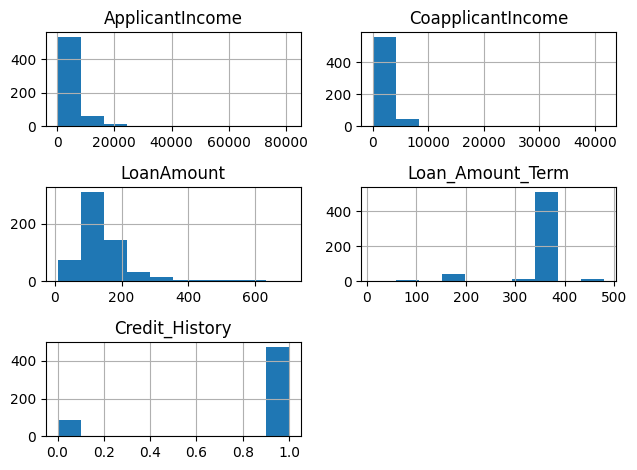

In [7]:
# Distribution of numerical variables
plt.figure(figsize=(12, 8))
train_data.hist()
plt.tight_layout()
plt.show()

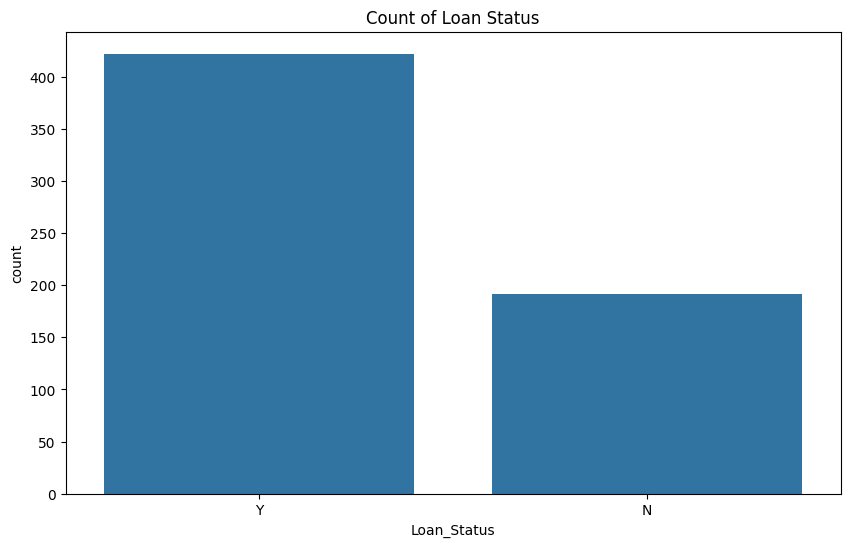

In [8]:
# Count of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Count of Loan Status')
plt.show()

<ipython-input-9-86d8bd526f9f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


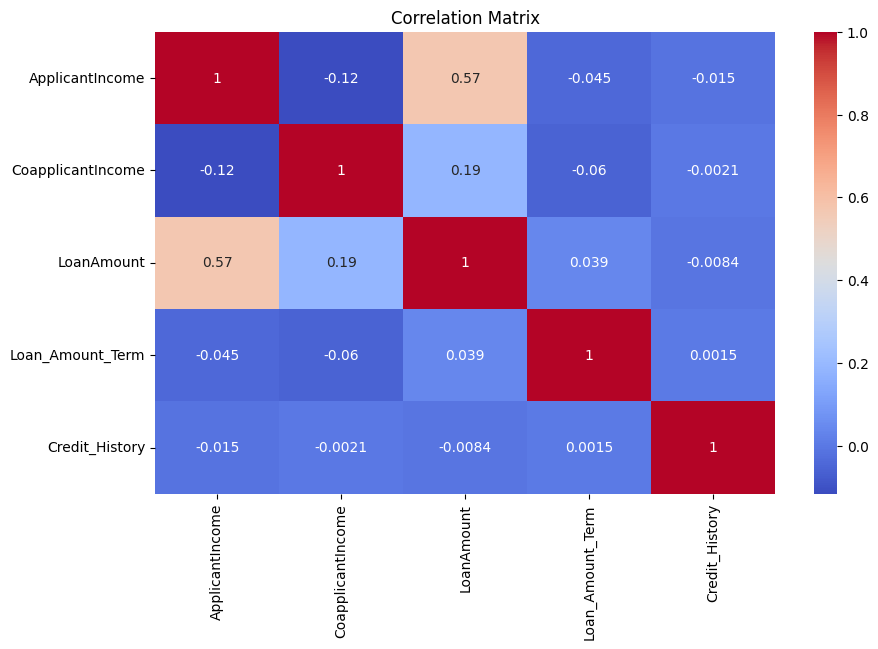

In [9]:
# Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Pre-processing  train_data**

In [10]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer

# List of numerical and categorical columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Create SimpleImputer objects for numerical and categorical columns
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values with median for numerical columns
train_data[numerical_columns] = median_imputer.fit_transform(train_data[numerical_columns])

# Impute missing values with mode for categorical columns
train_data[categorical_columns] = mode_imputer.fit_transform(train_data[categorical_columns])


In [12]:
# Check for missing values after imputation
missing_values = train_data.isnull().sum()
print(missing_values)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate over each column in train_data
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = encoder.fit_transform(train_data[column])

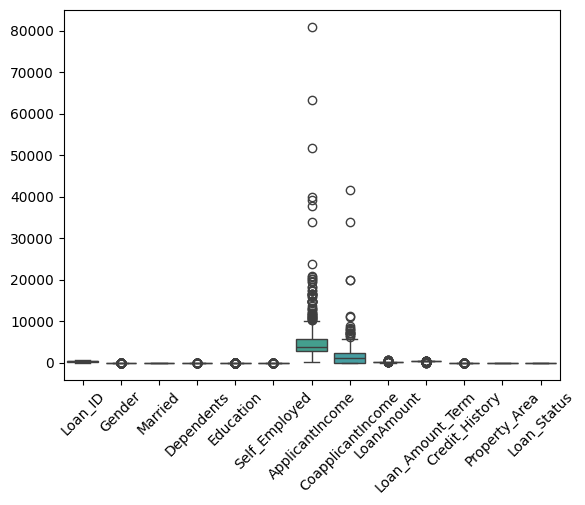

In [14]:
# Visualize the data using boxplots
sns.boxplot(data=train_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median
    column[column < lower_bound] = column.median()
    column[column > upper_bound] = column.median()

    return column

# Apply replace_outliers_with_median function to numerical columns in train_data
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_columns] = train_data[numerical_columns].apply(replace_outliers_with_median)



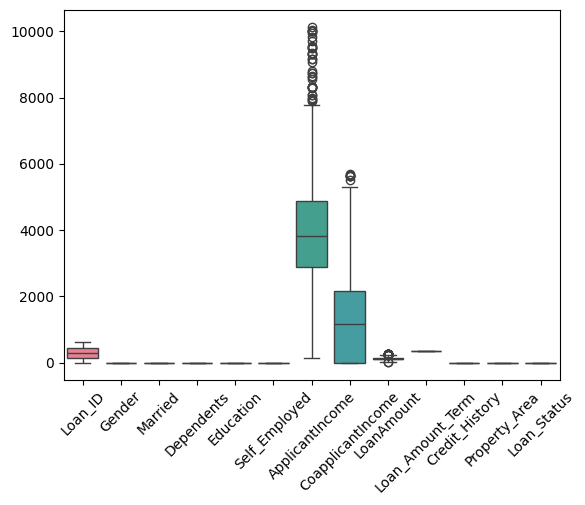

In [16]:
# Visualize the data using boxplots after handling outliers
sns.boxplot(data=train_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
# Check the modified train_data after handling outliers
print(train_data.describe())

          Loan_ID  Gender     Married  Dependents  Education  Self_Employed  \
count  614.000000   614.0  614.000000  614.000000      614.0          614.0   
mean   306.500000     1.0    0.653094    0.495114        0.0            0.0   
std    177.390811     0.0    0.476373    0.761519        0.0            0.0   
min      0.000000     1.0    0.000000    0.000000        0.0            0.0   
25%    153.250000     1.0    0.000000    0.000000        0.0            0.0   
50%    306.500000     1.0    1.000000    0.000000        0.0            0.0   
75%    459.750000     1.0    1.000000    1.000000        0.0            0.0   
max    613.000000     1.0    1.000000    2.000000        0.0            0.0   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000             614.0   
mean       4099.298046        1286.179023  128.451140             360.0   
std        1848.706334        1440.204497   44.799645          

In [18]:
#scaling since ApplicantIncome, CoapplicantIncome, and LoanAmount have wider ranges with higher standard deviation
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling (excluding Loan_Amount_Term and Credit_History)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])




In [19]:
# Check the scaled train_data
print(train_data.describe())


          Loan_ID  Gender     Married  Dependents  Education  Self_Employed  \
count  614.000000   614.0  614.000000  614.000000      614.0          614.0   
mean   306.500000     1.0    0.653094    0.495114        0.0            0.0   
std    177.390811     0.0    0.476373    0.761519        0.0            0.0   
min      0.000000     1.0    0.000000    0.000000        0.0            0.0   
25%    153.250000     1.0    0.000000    0.000000        0.0            0.0   
50%    306.500000     1.0    1.000000    0.000000        0.0            0.0   
75%    459.750000     1.0    1.000000    1.000000        0.0            0.0   
max    613.000000     1.0    1.000000    2.000000        0.0            0.0   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000             614.0   
mean          0.395365           0.225606    0.475901             360.0   
std           0.185074           0.252623    0.178485          

In [20]:
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

In [21]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [23]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<ipython-input-25-9e7d1817c259>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm')


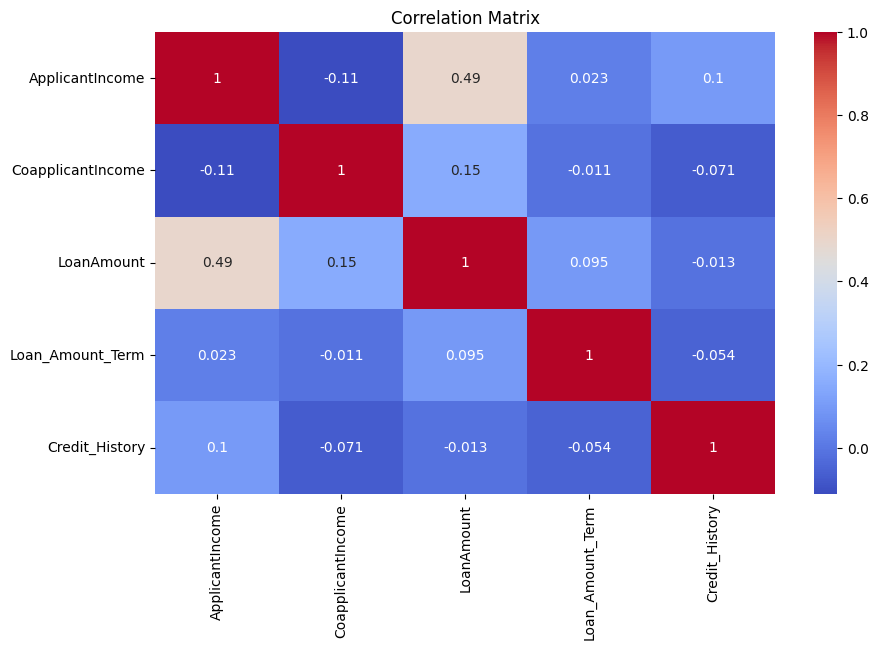

In [25]:
# Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**`Pre-processing  test_data`**

In [26]:
# Check for missing values
missing_values = test_data.isnull().sum()
print(missing_values)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [27]:
from sklearn.impute import SimpleImputer

# List of numerical and categorical columns in test_data
test_numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns
test_categorical_columns = test_data.select_dtypes(include=['object']).columns

# Create SimpleImputer objects for numerical and categorical columns in test_data
test_median_imputer = SimpleImputer(strategy='median')
test_mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values with median for numerical columns in test_data
test_data[test_numerical_columns] = test_median_imputer.fit_transform(test_data[test_numerical_columns])

# Impute missing values with mode for categorical columns in test_data
test_data[test_categorical_columns] = test_mode_imputer.fit_transform(test_data[test_categorical_columns])


In [28]:
# Check for missing values after imputation
missing_values = test_data.isnull().sum()
print(missing_values)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate over each column in test_data
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = encoder.fit_transform(test_data[column])

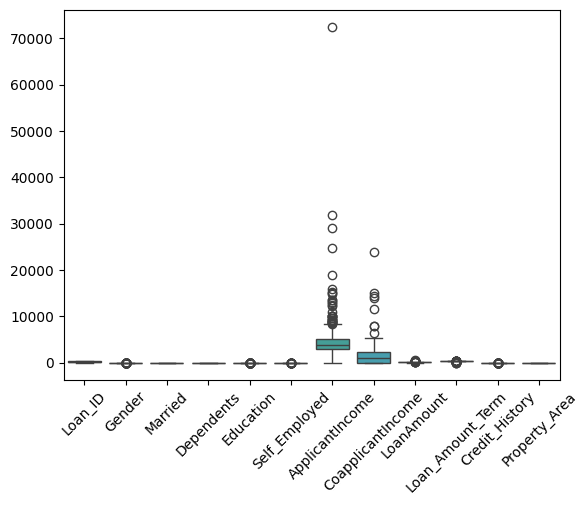

In [30]:
# Visualize the data using boxplots
sns.boxplot(data=test_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [31]:
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median
    column[column < lower_bound] = column.median()
    column[column > upper_bound] = column.median()

    return column


# Apply replace_outliers_with_median function to numerical columns in test_data
test_numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns
test_data[test_numerical_columns] = test_data[test_numerical_columns].apply(replace_outliers_with_median)



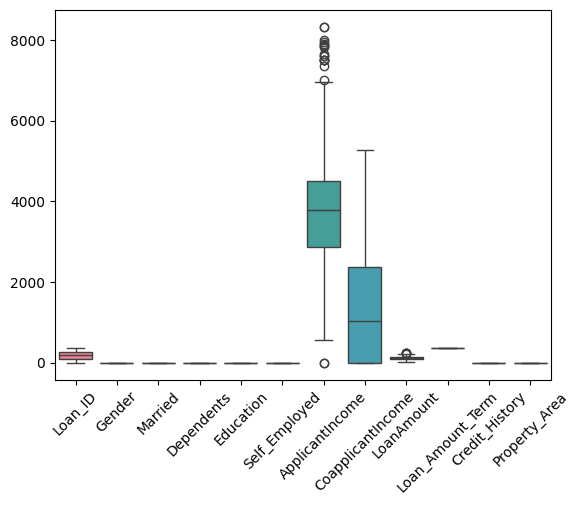

In [32]:
# Visualize the data using boxplots after handling outliers
sns.boxplot(data=test_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
# Check the modified test_data after handling outliers
print(test_data.describe())

          Loan_ID  Gender     Married  Dependents  Education  Self_Employed  \
count  367.000000   367.0  367.000000  367.000000      367.0          367.0   
mean   183.000000     1.0    0.634877    0.806540        0.0            0.0   
std    106.088014     0.0    0.482122    1.065177        0.0            0.0   
min      0.000000     1.0    0.000000    0.000000        0.0            0.0   
25%     91.500000     1.0    0.000000    0.000000        0.0            0.0   
50%    183.000000     1.0    1.000000    0.000000        0.0            0.0   
75%    274.500000     1.0    1.000000    2.000000        0.0            0.0   
max    366.000000     1.0    1.000000    3.000000        0.0            0.0   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  367.000000             367.0   
mean       3840.664850        1315.392371  126.207084             360.0   
std        1478.054651        1441.821690   39.661555          

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling (excluding Loan_Amount_Term and Credit_History)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns in test_data
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])


In [35]:
# Check the scaled train_data
print(test_data.describe())


          Loan_ID  Gender     Married  Dependents  Education  Self_Employed  \
count  367.000000   367.0  367.000000  367.000000      367.0          367.0   
mean   183.000000     1.0    0.634877    0.806540        0.0            0.0   
std    106.088014     0.0    0.482122    1.065177        0.0            0.0   
min      0.000000     1.0    0.000000    0.000000        0.0            0.0   
25%     91.500000     1.0    0.000000    0.000000        0.0            0.0   
50%    183.000000     1.0    1.000000    0.000000        0.0            0.0   
75%    274.500000     1.0    1.000000    2.000000        0.0            0.0   
max    366.000000     1.0    1.000000    3.000000        0.0            0.0   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  367.000000             367.0   
mean          0.460843           0.249505    0.463241             360.0   
std           0.177352           0.273487    0.187083          

**Modelling**-KNN

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Extracting features and target variable from train_data
X = train_data.drop(columns=['Loan_Status', 'Loan_ID'])
y = train_data['Loan_Status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Displaying the predictions
print("Predictions on Test Data:")
print(y_pred)


Predictions on Test Data:
[1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 1]


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary')  # 'binary' because we have a binary classification problem
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='binary')  # 'binary' because we have a binary classification problem
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='binary')  # 'binary' because we have a binary classification problem
print("F1-score:", f1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6016260162601627
Precision: 0.6534653465346535
Recall: 0.825
F1-score: 0.7292817679558012
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        43
           1       0.65      0.82      0.73        80

    accuracy                           0.60       123
   macro avg       0.51      0.51      0.49       123
weighted avg       0.55      0.60      0.56       123

Confusion Matrix:
[[ 8 35]
 [14 66]]


**Fine Tuning**

GridSearch method

In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the range of values as needed
    'weights': ['uniform', 'distance'],  # Consider different weighting schemes
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Choose the algorithm for nearest neighbors search
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.58      0.16      0.25        43
           1       0.68      0.94      0.79        80

    accuracy                           0.67       123
   macro avg       0.63      0.55      0.52       123
weighted avg       0.64      0.67      0.60       123



In [45]:

# Load the sample submission file into a DataFrame
submission_df = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [46]:
# Use the best estimator from the grid search
best_knn_classifier = grid_search.best_estimator_

# Make predictions on the test dataset
test_predictions = best_knn_classifier.predict(test_data.drop(columns=['Loan_ID']))

# Display the predictions
print(test_predictions)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [47]:
# Convert integer predictions to string labels
mapped_predictions = ['Y' if pred == 1 else 'N' for pred in test_predictions]

# Replace the 'Loan_Status' column with the predicted values
submission_df['Loan_Status'] = mapped_predictions


In [48]:
# Save the modified DataFrame as a new CSV file
submission_df.to_csv('KNN.csv', index=False)

In [49]:
from google.colab import files

files.download('KNN.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
rf=pd.read_csv('/content/KNN.csv')

In [52]:
rf

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
